In [1]:
import zlib
import binascii
from tqdm import tqdm


In [2]:
COMPANY_NAMES = ['SANTANDER','UNICREDIT','CEZ','PKNORLEN','PKOBP','DINOPL','PZU','ALLEGRO','SANPL','KGHM','MOL','PEKAO','PEPCO','INGBSK','LPP','PGE','KRKA','MBANK','CDPROJEKT','CYFRPLSAT','HANDLOWY','ORANGEPL','BNPPL','IIAAV','BUDIMEX','JSW','KRUK','MILLENNIUM','INTERCARS','ASSECOPOL','PEP','ALIOR','KETY','GRPAAZOTY','AMREST','XTB','TAURONPE','GTC','ENEA','LIVECHAT','WIRTUALNA','GRUPRACUJ','NEUCA','STSHLDING','PLAYWAY','DOMDEV','ASSECOSEE','CIECH','BENEFIT','PCCROKITA']

In [3]:
def to_int(bytes : bytes) -> int:
    return int.from_bytes(bytes, byteorder='big')

def to_str(bytes:bytes) -> str:
    return "".join([chr(s) for s in bytes]).strip().strip('\x00')

In [4]:
def msg_price_update(msg):
    offset = 0
    msg_fields = {}
    MSG_STRUCT = [
        ('MsgType',                     2, to_int),
        ('SymbolIndex',                 4, to_int),
        ('SourceTime',                  4, to_int),
        ('SourceSeqNum',                4, to_int),
        ('Price',                       4, to_int),
        ('HighestPrice',                4, to_int),
        ('LowestPrice',                 4, to_int),
        ('VariationLastPrice',          4, to_int),
        ('SystemID',                    4, to_int),
        ('SourceTimeMicroSecs',         2, to_int),
        ('TypeOfPrice',                 2, to_int),
        ('Filler',                      2, to_int),
        ('PriceScaleCode',              1, to_int),
        ('VariationScaleCode',          1, to_int),
    ]
    for field_name, field_len, fun in MSG_STRUCT:
        msg_fields[field_name] = fun(msg[offset:offset+field_len])
        offset+=field_len
    if msg_fields['TypeOfPrice'] not in [34, 30, 34, 35,36,37,51]:
        print(f'msg:{msg_fields}')    

In [5]:
def msg_referential(msg):
    offset = 0
    msg_fields = {}
    MSG_STRUCT = [
        ('MsgType',	2,	to_int),
        ('SymbolIndex',	4,	to_int),
        ('SourceSeqNum',	4,	to_int),
        ('SourceTime',	4,	to_int),
        ('LastAdjPrice',	4,	to_int),
        ('SystemID',	4,	to_int),
        ('PrevVolumeTraded',	4,	to_int),
        ('Filler',	4,	to_int),
        ('SourceTimeMicroSecs',	2,	to_int),
        ('Stock Exchange Code', 2,	to_int),
        ('TypeOfInstrument',	2,	to_int),
        ('EventDate',	8,	to_str),
        ('InstrumentName',	18,	to_str),
        ('PeriodIndicator',	1,	to_str),
        ('TypeOfMarketAdmission',	1,	to_str),
        ('IssuingCountryCode',	3,	to_str),
        ('TradingCurrency',	3,	to_str),
        ('InstrumentGroupCode',	3,	to_str),
        ('InstrumentCategory',	1,	to_str),
        ('InstrumentCode',	12,	to_str),
        ('DateOfLastTrade',	8,	to_str),
        ('UnderlyingRepoISINCode',	12,	to_str),
        ('ExpiryDate',	8,	to_str),
        ('FirstSettlementDate',	8,	to_str),
        ('TypeOfDerivatives',	1,	to_str),
        ('BICDepositary',	11,	to_str),
        ('ICB',	4,	to_str),
        ('MIC',	4,	to_str),
        ('UnderlyingISINCode',	12,	to_str),
        ('DepositaryList',	25,	to_str),
        ('MainDepositary',	5,	to_str),
        ('TypeOfCorporateEvent',	2,	to_str),
        ('TimeLagEuronextUTC',	5,	to_str),
        ('TimeLagMiFIDRegUTC',	5,	to_str),
        ('CFI',	6,	to_str),
        ('Filler',	4,	to_int),
        ('IndexSetOfVarPriceTick',	2,	to_str),
        ('MarketFeedCode',	2,	to_str),
        ('MICList',	24,	to_str),
        ('IndustryCode',	4,	to_str),
        ('IndustryText',	100,	to_str),
        ('FinancialMarketCode',	3,	to_str),
        ('USIndicators',	7,	to_str),
        ('Filler',	2,	to_int),
        ('PrevDayCapitalTraded',	8,	to_int),
        ('LotSize',	8,	to_int),
        ('NumberInstrumentCirc',	8,	to_int),
        ('SharesOut',	8,	to_int),
        ('AuthShares',	8,	to_int),
        ('PriceNotation',	4,	to_str),
        ('RepoIndicator',	1,	to_str),
        ('NotionalAmount',	20,	to_str),
        ('NotionalCurrency',	3,	to_str),
        ('LastAdjPriceScaleCode',	1,	to_int),
        ('MarketIndicator',	1,	to_int),
        ('PrevDayCapitalTradedScale',	1,	to_int),
        ('TaxCode',	1,	to_int),
        ('Filler',	1,	to_int),
        ('LotSizeScaleCode',	1,	to_int),
        ('Filler',	1,	to_int),
        ('Mnemo',	5,	to_str),
        ('TradingCode',	12,	to_str),
        ('Filler',	4,	to_int),
        ('StrikePrice',	4,	to_int),
        ('StrikeCurrency',	3,	to_str),
        ('StrikeScaleCode',	1,	to_int),
        ('CurrencyCoef',	4,	to_int),
        ('CurrencyCoefScaleCode',	1,	to_int),
        ('TradingCurrencyIndicator',	1,	to_int),
        ('StrikeCurrencyIndicator',	1,	to_int),
        ('MarketSegment',	2,	to_str),
        ('Algo',	1,	to_str),
        ('LocalName',	30,	to_str),
        ('BlockSize',	4,	to_int),
        ('SSMarketMaker',	1,	to_str),
        ('SSNonMarketMaker',	1,	to_str),
        ('SettlementDelay',	2,	to_str),
        ('OptionType',	1,	to_str),
        ('DeliveryType',	1,	to_str),
        ('ExerciseType',	1,	to_str),
        ('MultiplierScaleCode',	1,	to_int),
        ('WarrantThresholdMinScaleCode',	1,	to_int),
        ('WarrantThresholdMaxScaleCode',	1,	to_int),
        ('Filler',	2,	to_int),
        ('WarrantThresholdMin',	4,	to_int),
        ('WarrantThresholdMax',	4,	to_int),
        ('MinQuantity',	4,	to_int),
        ('MaxQuantity',	4,	to_int),
        ('Multiplier',	4,	to_int),
        ('Filler',	4,	to_int),
        ('MaxValue',	8,	to_int)
    ]
    for field_name, field_len, fun in MSG_STRUCT:
        msg_fields[field_name] = fun(msg[offset:offset+field_len])
        offset+=field_len
    
    return msg_fields

In [6]:
symbols_indexes = {}
def populate_company_names(msg_fields : dict) -> None:
    global symbols_indexes

    if not symbols_indexes.get(msg_fields['SymbolIndex']) and msg_fields['InstrumentCategory'] == 'A' and any([True for n in COMPANY_NAMES if n in msg_fields['InstrumentName']]): # if not added -> add
        symbols_indexes[msg_fields['SymbolIndex']] = msg_fields


In [7]:
order_book = []
def populate_order_book(msg_fields : dict) -> None:
    global order_book
    if msg_fields['SymbolIndex'] in symbols_indexes and msg_fields['ActionType'] not in ['F']: # if not added and if not actiontype not relevant -> add
        order_book.append(msg_fields)


In [8]:
def msg_order_book(msg):
    offset = 0
    msg_fields = {}
    MSG_STRUCT = [
        ('MsgType',                    2, to_int),
        ('SymbolIndex',                4, to_int),
        ('SourceTime',                 4, to_int),
        ('SourceSeqNum',               4, to_int),
        ('Price',                      4, to_int),
        ('AggregatedVolume',           4, to_int),
        ('Volume',                     4, to_int),
        ('LinkID',                     4, to_int),
        ('OrderID',                    4, to_int),
        ('SystemID',                   4, to_int),
        ('SourceTimeMicroSecs',        2, to_int),
        ('NumberOrders',               2, to_int),
        ('Side',                       1, to_str),
        ('OrderType',                  1, to_str),
        ('ActionType',                 1, to_str),
        ('PriceScaleCode',             1, to_int),
        ('OrderDate',                  4, to_int),
        ('OrderPriorityDate',          4, to_int),
        ('OrderPriorityTime',          4, to_int),
        ('OrderPriorityMicroSecs',     2, to_int),
        ('OrderOrigin',                1, to_str),
        ('Filler',                     1, to_int),
    ]
    for field_name, field_len, fun in MSG_STRUCT:
        msg_fields[field_name] = fun(msg[offset:offset+field_len])
        offset+=field_len

    # print(f'msg:{msg_fields}')
    return msg_fields

def msg_order_book_retransmission(msg):
    offset = 0
    msg_fields = {}
    MSG_STRUCT = [
        ('MsgType',                     2, to_int),
        ('SourceTime',                  4, to_int),
        ('SourceSeqNum',                4, to_int),
        ('ApplicationID',               2, to_str),
        ('InstanceNum',                 1, to_int),
        ('RetransmissionIndicator',     1, to_str),
    ]
    for field_name, field_len, fun in MSG_STRUCT:
        msg_fields[field_name] = fun(msg[offset:offset+field_len])
        offset+=field_len

    print(f'msg:{msg_fields}')

In [9]:
HEADER = [
    ('PacketLength',    2),
    ('PacketType',      2),
    ('PacketSeqNum',    4),
    ('SendTime',        4),
    ('ServiceID',       2),
    ('DeliveryFlag',    1),
    ('NumberMsgEntries',1),
]



def decode_payload(payload, exec_msg_num):
    off_set = 0
    header_decoded = {}
    for field_name, field_len in HEADER:
        decoded = payload[off_set:off_set+field_len]
        header_decoded[field_name] = to_int(decoded)
        off_set+=field_len
    # print(header_decoded)

    if header_decoded['PacketType'] == 501 and header_decoded['DeliveryFlag'] == 16:
        decompresor = zlib.decompressobj()
        payload = decompresor.decompress(payload[off_set:])
        # print(f'decompress payload len {len(payload)} unused({decompresor.eof}): {decompresor.unused_data}')
        off_set=0

    MSG_LENGHT = 2
    for msg_num in range(header_decoded['NumberMsgEntries']):
        
        msg_lenght = int.from_bytes(payload[off_set:off_set+MSG_LENGHT], byteorder='big') 
        off_set+=MSG_LENGHT

        msg = payload[off_set:off_set+msg_lenght]
        off_set+=msg_lenght

        msg_type = to_int(msg[0:2])
        if msg_type == 556 == exec_msg_num:
            populate_company_names(msg_referential(msg))
            # print(f'{msg_num}# len: {msg_lenght} type: {msg_type} TypeOfInstrument: {to_int(msg[34:34+2])} StockExchangeCode : {to_int(msg[34-2:34-2+2])} InstrumentCategory: {to_str(msg[75-2:75-2+1])} TradingCode: {to_str(msg[432-2:432-2+12])}') 
            pass
        elif msg_type == 230 == exec_msg_num:
            populate_order_book(msg_order_book(msg))
            # agregate_spreads(msg_order_book(msg))
            pass
        elif msg_type == 231:
            pass
            # msg_order_book_retransmission(msg)
        elif msg_type == 241:
            # msg_price_update(msg)
            pass
        elif msg_type == 140:
            pass
            # msg_BBO5(msg)
        else:
            pass
            # print(f'{msg_num}# len: {msg_lenght} type: {msg_type}')
            

    # print(f'End off msgs offset: {off_set}')


In [10]:
def main_decoder(content : bytes, exec_msg_num : int):
    #iterators
    msg_num = 0
    offset = 0

    #consts
    BYTES_FOR_MSG_LENGHT = 2

    print(f'Reading {len(content)} bytes..')

    while(offset<len(content)):
        payload_lenght = int.from_bytes(content[offset:offset+BYTES_FOR_MSG_LENGHT], byteorder='big') #2 bytes big endian payload lenght
        offset += BYTES_FOR_MSG_LENGHT
        
        payload = content[offset:offset+payload_lenght]

        # show msg
        # print(f'{msg_num}# MSG[{offset}:{offset+payload_lenght}] len: {payload_lenght} ') #\n {payload}
        decode_payload(payload, exec_msg_num)

        #check end sesion
        if payload_lenght == 0:
            print('END OF SESION')
            break

        offset += payload_lenght
        msg_num +=1

        # if msg_num == 1000: 
        #     print('FORCE END')
        #     break

    print(f'readed {msg_num} msgs, payload_lenght,offset: {payload_lenght},{offset} tru_len: {len(payload)} ')

In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def plot_orderbook(company,company_sell,company_buy):
    print(f'''{company}: {company_sell['Price'].iloc[0]} / {10 ** company_sell['PriceScaleCode'].iloc[0]} - {company_buy['Price'].iloc[0]} / {10 ** company_buy['PriceScaleCode'].iloc[0]} ''')
    # PLOT  
    buy_by_volume = company_buy.groupby('Price').sum().reset_index()[['Volume', 'Price']]
    sell_by_volume = company_sell.groupby('Price').sum().reset_index()[['Volume', 'Price']]
    order_book_volume = buy_by_volume.merge(sell_by_volume, on='Price', how='outer', suffixes=('_b','_s'))
    order_book_volume = order_book_volume.sort_values('Price')
    order_book_volume.plot(x='Price', figsize=(50,15))



In [12]:
def calculate_spreads(order_book : list, symbols_indexes : dict):
    
    df = pd.DataFrame.from_dict(order_book)
    df['Company_name'] = df['SymbolIndex'].apply(lambda x: symbols_indexes[x]['InstrumentName'])
    
    spreads = []
    for company in COMPANY_NAMES:
        
        company_order_book = df[df['Company_name'] == company]
        
        if len(company_order_book) == 0:
            spreads.append(None)
            continue

        company_order_book = company_order_book.sort_values('SourceSeqNum')
        company_order_book = company_order_book.set_index('SourceSeqNum')

        if len(company_order_book[(company_order_book['ActionType'] == 'Y')]) <= 1:
            spreads.append(np.Inf)
            continue
        
        # print(company, len(company_order_book), before, after)
        before=company_order_book[company_order_book['ActionType'] == 'Y'].index[0]
        after = company_order_book.loc[before:company_order_book.tail(1).index[0]]
        after = after[after['ActionType'] != 'Y']
        if len(after)!=0:
            after = after.index[0]
            company_order_book = company_order_book.loc[before:after]
            company_order_book = company_order_book.drop(after)
        else: 
            after = company_order_book.tail(1).index[0]
            company_order_book = company_order_book.loc[before:after]

        company_buy = company_order_book[company_order_book['Side'] == '1'].sort_values('Price', ascending=False)
        company_sell = company_order_book[(company_order_book['Side'] == '2') | (company_order_book['Side'] == '5')].sort_values('Price', ascending=True)


        if len(company_buy) == 0 or len(company_sell) == 0:
            spreads.append(np.Inf)
            continue
        
        mid_point = (company_sell['Price'].iloc[0] / 10 ** company_sell['PriceScaleCode'].iloc[0] + company_buy['Price'].iloc[0] / 10 ** company_buy['PriceScaleCode'].iloc[0] )/2
        spread_val = company_sell['Price'].iloc[0] / 10 ** company_sell['PriceScaleCode'].iloc[0] - company_buy['Price'].iloc[0] / 10 ** company_buy['PriceScaleCode'].iloc[0] 
        spread_val /= mid_point
        
        # # if spread_val < 0:
            #plot_orderbook(company,company_sell,company_buy)
        
        spreads.append(spread_val)
    return spreads

In [13]:
import glob
import os

In [14]:
def get_file_date(filepath):
    filename = os.path.basename(filepath)
    filename = filename.split('-')[-3:]
    return str('-'.join(filename).split('.')[0])

In [15]:
YEAR_FOLDER_PATH = 'F:\\2017'

df = pd.DataFrame(columns=['Date'] + COMPANY_NAMES)
order_book = []
symbols_indexes = {}

it = 0
files_paths = glob.glob(os.path.join(YEAR_FOLDER_PATH, '*.bin'))[23:]
for file_path in files_paths:

    print('Reading: ',file_path,': ', it,'/',len(files_paths))
    it+=1

    with open(file_path, "rb") as fin:  # opening a binary file
        content = fin.read()  # reading all lines

    main_decoder(content, 556)
    len(symbols_indexes)
    main_decoder(content, 230)
    len(order_book)
    spreads = calculate_spreads(order_book, symbols_indexes)
    order_book = []
    symbols_indexes = {}
    date = get_file_date(file_path)
    

    new_df = pd.DataFrame([[date] + spreads], columns=['Date'] + COMPANY_NAMES)
    df = df.append(new_df)
    df.to_csv('2017_normalized_1.csv')


Reading:  F:\2017\rf_udp-101-2017-02-03.bin :  0 / 118
Reading 499172416 bytes..
readed 3124183 msgs, payload_lenght,offset: 16,499172416 tru_len: 16 
Reading 499172416 bytes..
readed 3124183 msgs, payload_lenght,offset: 16,499172416 tru_len: 16 
Reading:  F:\2017\rf_udp-101-2017-02-06.bin :  1 / 118
Reading 483716654 bytes..
readed 3073847 msgs, payload_lenght,offset: 16,483716654 tru_len: 16 
Reading 483716654 bytes..
readed 3073847 msgs, payload_lenght,offset: 16,483716654 tru_len: 16 
Reading:  F:\2017\rf_udp-101-2017-02-07.bin :  2 / 118
Reading 433097555 bytes..
readed 2827893 msgs, payload_lenght,offset: 16,433097555 tru_len: 16 
Reading 433097555 bytes..
readed 2827893 msgs, payload_lenght,offset: 16,433097555 tru_len: 16 
Reading:  F:\2017\rf_udp-101-2017-02-08.bin :  3 / 118
Reading 469604674 bytes..
readed 2984968 msgs, payload_lenght,offset: 16,469604674 tru_len: 16 
Reading 469604674 bytes..
readed 2984968 msgs, payload_lenght,offset: 16,469604674 tru_len: 16 
Reading:  F:

In [17]:
df


,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,SANPL,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,2017-02-03,0.125490,0.035260,0.008151,0.003548,0.004890,None,0.009599,None,None,...,0.007018,None,0.001765,None,0.021053,0.030281,0.032333,0.006598,0.015357,0.006521
0,2017-02-06,-2.000000,inf,0.014160,0.009409,0.004503,None,0.007581,None,None,...,0.013716,None,0.008822,None,0.040816,0.019481,0.015462,0.003180,0.032413,0.014474
0,2017-02-07,0.113108,0.091667,0.023213,0.003906,0.005687,None,0.002511,None,None,...,0.011849,None,0.011331,None,0.008160,0.011227,0.010889,0.014249,0.019223,0.004355
0,2017-02-08,0.093426,0.047091,0.018354,0.007462,0.005734,None,0.008322,None,None,...,0.001750,None,0.007942,None,0.020632,0.021783,0.007240,0.016364,0.027439,0.005606
0,2017-02-09,0.035600,0.024273,0.011429,0.004654,0.007994,None,0.006615,None,None,...,0.002628,None,0.017627,None,0.004180,0.012308,0.012704,0.013243,0.033256,0.010479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2017-07-19,0.074462,0.054772,0.010828,0.008518,0.010141,0.037574,0.003165,None,None,...,0.032598,None,0.014162,None,0.039333,0.013245,0.027239,0.005119,0.017024,0.008433
0,2017-07-20,0.100244,0.054204,0.013163,0.006767,0.001668,0.038164,0.004913,None,None,...,0.027738,None,0.010297,None,0.016529,0.012978,0.006536,0.014342,0.018657,0.000538
0,2017-07-21,0.105263,0.066920,0.008342,0.004094,0.003351,0.036944,0.004397,None,None,...,0.036405,None,0.030616,None,0.002950,0.038692,0.016529,0.016481,0.024952,0.004077
0,2017-07-24,0.069965,0.106744,0.028294,0.002351,0.003907,0.048857,0.001984,None,None,...,0.045084,None,0.019611,None,0.046816,0.044016,0.083121,0.008957,0.021853,0.010056


In [18]:
# spreads = calculate_spreads(order_book, symbols_indexes)

In [19]:
# with open("rf_udp-101-2013-10-11.bin", "rb") as f:  # opening a binary file
#     content = f.read()  # reading all lines

# main_decoder(content, 556)
# len(symbols_indexes)
# main_decoder(content, 230)
# len(order_book)

In [20]:
# df = pd.DataFrame.from_dict(order_book)
# df['Company_name'] = df['SymbolIndex'].apply(lambda x: symbols_indexes[x]['InstrumentName'])

In [21]:
# spreads = []
# company = ['UNICREDIT'][0]
    
# company_order_book = df[df['Company_name'] == company]

# if len(company_order_book) == 0:
#     spreads.append(None)

# company_order_book = company_order_book.sort_values('SourceSeqNum')
# company_order_book = company_order_book.set_index('SourceSeqNum')


# before=company_order_book[company_order_book['ActionType'] == 'Y'].index[0]
# after = company_order_book.loc[before:company_order_book.tail(1).index[0]]
# after = after[after['ActionType'] != 'Y']
# if len(after)!=0:
#     after = after.index[0]
#     company_order_book = company_order_book.loc[before:after]
#     company_order_book = company_order_book.drop(after)
# else: 
#     after = after.tail(1).index[0]
#     company_order_book = company_order_book.loc[before:after]
# # company_order_book = company_order_book
# # company_order_book[company_order_book['ActionType'] == 'D']

# company_buy = company_order_book[company_order_book['Side'] == '1'].sort_values('Price', ascending=False)
# company_sell = company_order_book[(company_order_book['Side'] == '2') | (company_order_book['Side'] == '5')].sort_values('Price', ascending=True)

# if len(company_buy) == 0 or len(company_sell) == 0:
#     spreads.append(np.Inf)
#     print('INFINITY')

# spread_val = company_sell['Price'].iloc[0] / 10 ** company_sell['PriceScaleCode'].iloc[0] - company_buy['Price'].iloc[0] / 10 ** company_buy['PriceScaleCode'].iloc[0] 
# spread_val

In [22]:
# df = pd.DataFrame.from_dict(order_book)
# df['Company_name'] = df['SymbolIndex'].apply(lambda x: symbols_indexes[x]['InstrumentName'])
# df

In [23]:
# def convertMillis(OrderPriorityDate,OrderPriorityTime):
#    if OrderPriorityDate == 0:
#       return None
#    seconds=int((OrderPriorityTime/1000)%60)
#    minutes=int((OrderPriorityTime/(1000*60))%60)
#    hours=int((OrderPriorityTime/(1000*60*60))%24)
#    OrderPriorityDate = str(OrderPriorityDate)
#    day = int(OrderPriorityDate[6:8])
#    month = int(OrderPriorityDate[4:6])
#    year = int(OrderPriorityDate[0:4])
#    return datetime.datetime(year, month, day, hours, minutes, seconds)

# df['Priority_Date_Time'] = df.apply(lambda x: convertMillis(x['OrderPriorityDate'], x['OrderPriorityTime']), axis=1)
# df


In [24]:
# df = df[['SymbolIndex', 'SourceTime', 'SourceSeqNum', 'Price', 'AggregatedVolume', 'Volume', 'OrderID', 'ActionType', 'Company_name', 'Priority_Date_Time', 'Side', 'OrderType','PriceScaleCode']]
# df

In [25]:
# orange_ = df[df['Company_name'] == 'CYFRPLSAT']
# # orange_ = orange_[orange_['ActionType'] == 'Y']
# orange_ = orange_.sort_values('SourceSeqNum')
# orange_ = orange_.set_index('SourceSeqNum')
# before=orange_[(orange_['ActionType'] == 'Y') & ('Y' != orange_['ActionType'].shift(1))].index[0]
# after=orange_[(orange_['ActionType'] != 'Y') & ('Y' == orange_['ActionType'].shift(1))].index[0]
# orange_=orange_.truncate(before=before ,after=after)
# orange_=orange_.drop(orange_.tail(1).index)

# orange_

In [26]:
# orange_buy = orange_[orange_['Side'] == '1'].sort_values('Price', ascending=False)
# orange_sell = orange_[(orange_['Side'] == '2') | (orange_['Side'] == '5')].sort_values('Price', ascending=True)

In [27]:
# SPREAD = orange_sell['Price'].iloc[0] / 10 ** orange_sell['PriceScaleCode'].iloc[0] - orange_buy['Price'].iloc[0] / 10 ** orange_buy['PriceScaleCode'].iloc[0] 
# SPREAD

In [28]:
# buy_by_volume = orange_buy.groupby('Price').sum().reset_index()[['Volume', 'Price']]
# sell_by_volume = orange_sell.groupby('Price').sum().reset_index()[['Volume', 'Price']]

# order_book_volume = buy_by_volume.merge(sell_by_volume, on='Price', how='outer', suffixes=('_b','_s'))
# order_book_volume = order_book_volume.sort_values('Price')
# order_book_volume.plot(x='Price', figsize=(50,15))

In [29]:
# order_book_volume.plot(x='Price', figsize=(50,15))

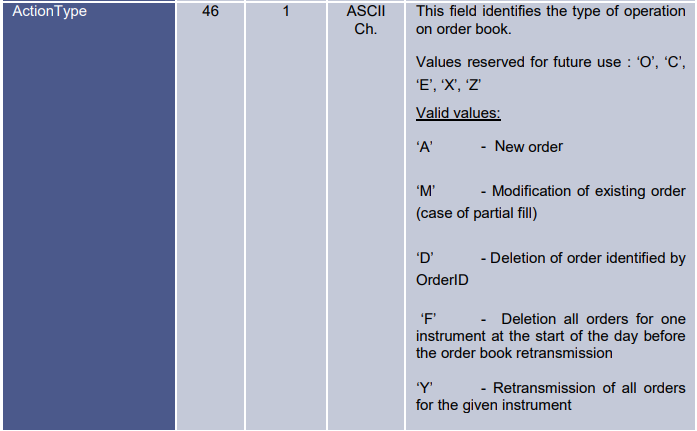
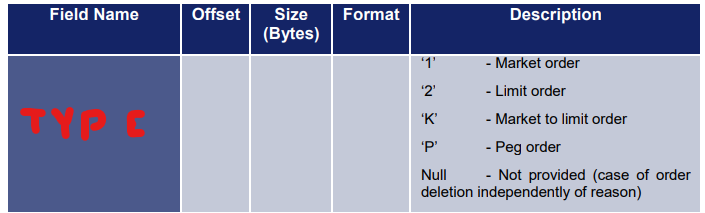
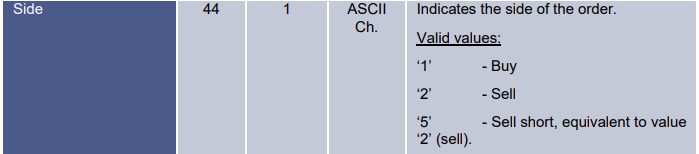